# Sample Insurance Claim Prediction


* Dataset is from: https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset

Content
This is "Sample Insurance Claim Prediction Dataset" which based on "[Medical Cost Personal Datasets][1]" to update sample value on top.

age : age of policyholder

sex: gender of policy holder (female=0, male=1) 

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height, objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 25 

steps: average walking steps per day of policyholder 

children: number of children / dependents of policyholder 

smoker: smoking state of policyholder (non-smoke=0;smoker=1) 

region: the residential area of policyholder in the US (northeast=0, northwest=1, southeast=2, southwest=3) 

charges: individual medical costs billed by health insurance insuranceclaim: yes=1, no=0


### Load data and data summary

In [31]:
#load necessary package and libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline



In [32]:
#load data as df
filename = 'insurance3r2.csv'
df = pd.read_csv(filename)
df = df.dropna()

#check the first 5 rows of df
df.head()

,id,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
0,1,19,0,27.900,3009,0,1,3,16884.92400,1
1,2,18,1,33.770,3008,1,0,2,1725.55230,1
2,3,28,1,33.000,3009,3,0,2,4449.46200,0
3,4,33,1,22.705,10009,0,0,1,21984.47061,0
4,5,32,1,28.880,8010,0,0,1,3866.85520,1


In [33]:
#shuffle data
df = df.iloc[np.random.permutation(len(df))].reset_index(drop = True)

In [34]:
#check the data types of each column
df.dtypes

id                  int64
age                 int64
sex                 int64
bmi               float64
steps               int64
children            int64
smoker              int64
region              int64
charges           float64
insuranceclaim      int64
dtype: object

Insuranceclaim may need to be changed as Boolean 

In [35]:
# summary of each Numerical variable
df.describe()

,id,age,sex,bmi,steps,children,smoker,region,charges,insuranceclaim
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,669.500000,39.207025,0.505232,30.663397,5328.623318,1.094918,0.204783,1.515695,13270.422265,0.585202
std,386.391641,14.049960,0.500160,6.098187,2453.643236,1.205493,0.403694,1.104885,12110.011237,0.492871
min,1.000000,18.000000,0.000000,15.960000,3000.000000,0.000000,0.000000,0.000000,1121.873900,0.000000
25%,335.250000,27.000000,0.000000,26.296250,3008.000000,0.000000,0.000000,1.000000,4740.287150,0.000000
50%,669.500000,39.000000,1.000000,30.400000,4007.000000,1.000000,0.000000,2.000000,9382.033000,1.000000
75%,1003.750000,51.000000,1.000000,34.693750,8004.000000,2.000000,0.000000,2.000000,16639.912515,1.000000
max,1338.000000,64.000000,1.000000,53.130000,10010.000000,5.000000,1.000000,3.000000,63770.428010,1.000000


In [36]:
# summary of all variables
#df.describe(include = 'all')

In [37]:
#df.info()

In [38]:
df['insuranceclaim'].value_counts()

1    783
0    555
Name: insuranceclaim, dtype: int64

Don't have to rebalance data. Yay!

### Data Visualization

Attribute Plots

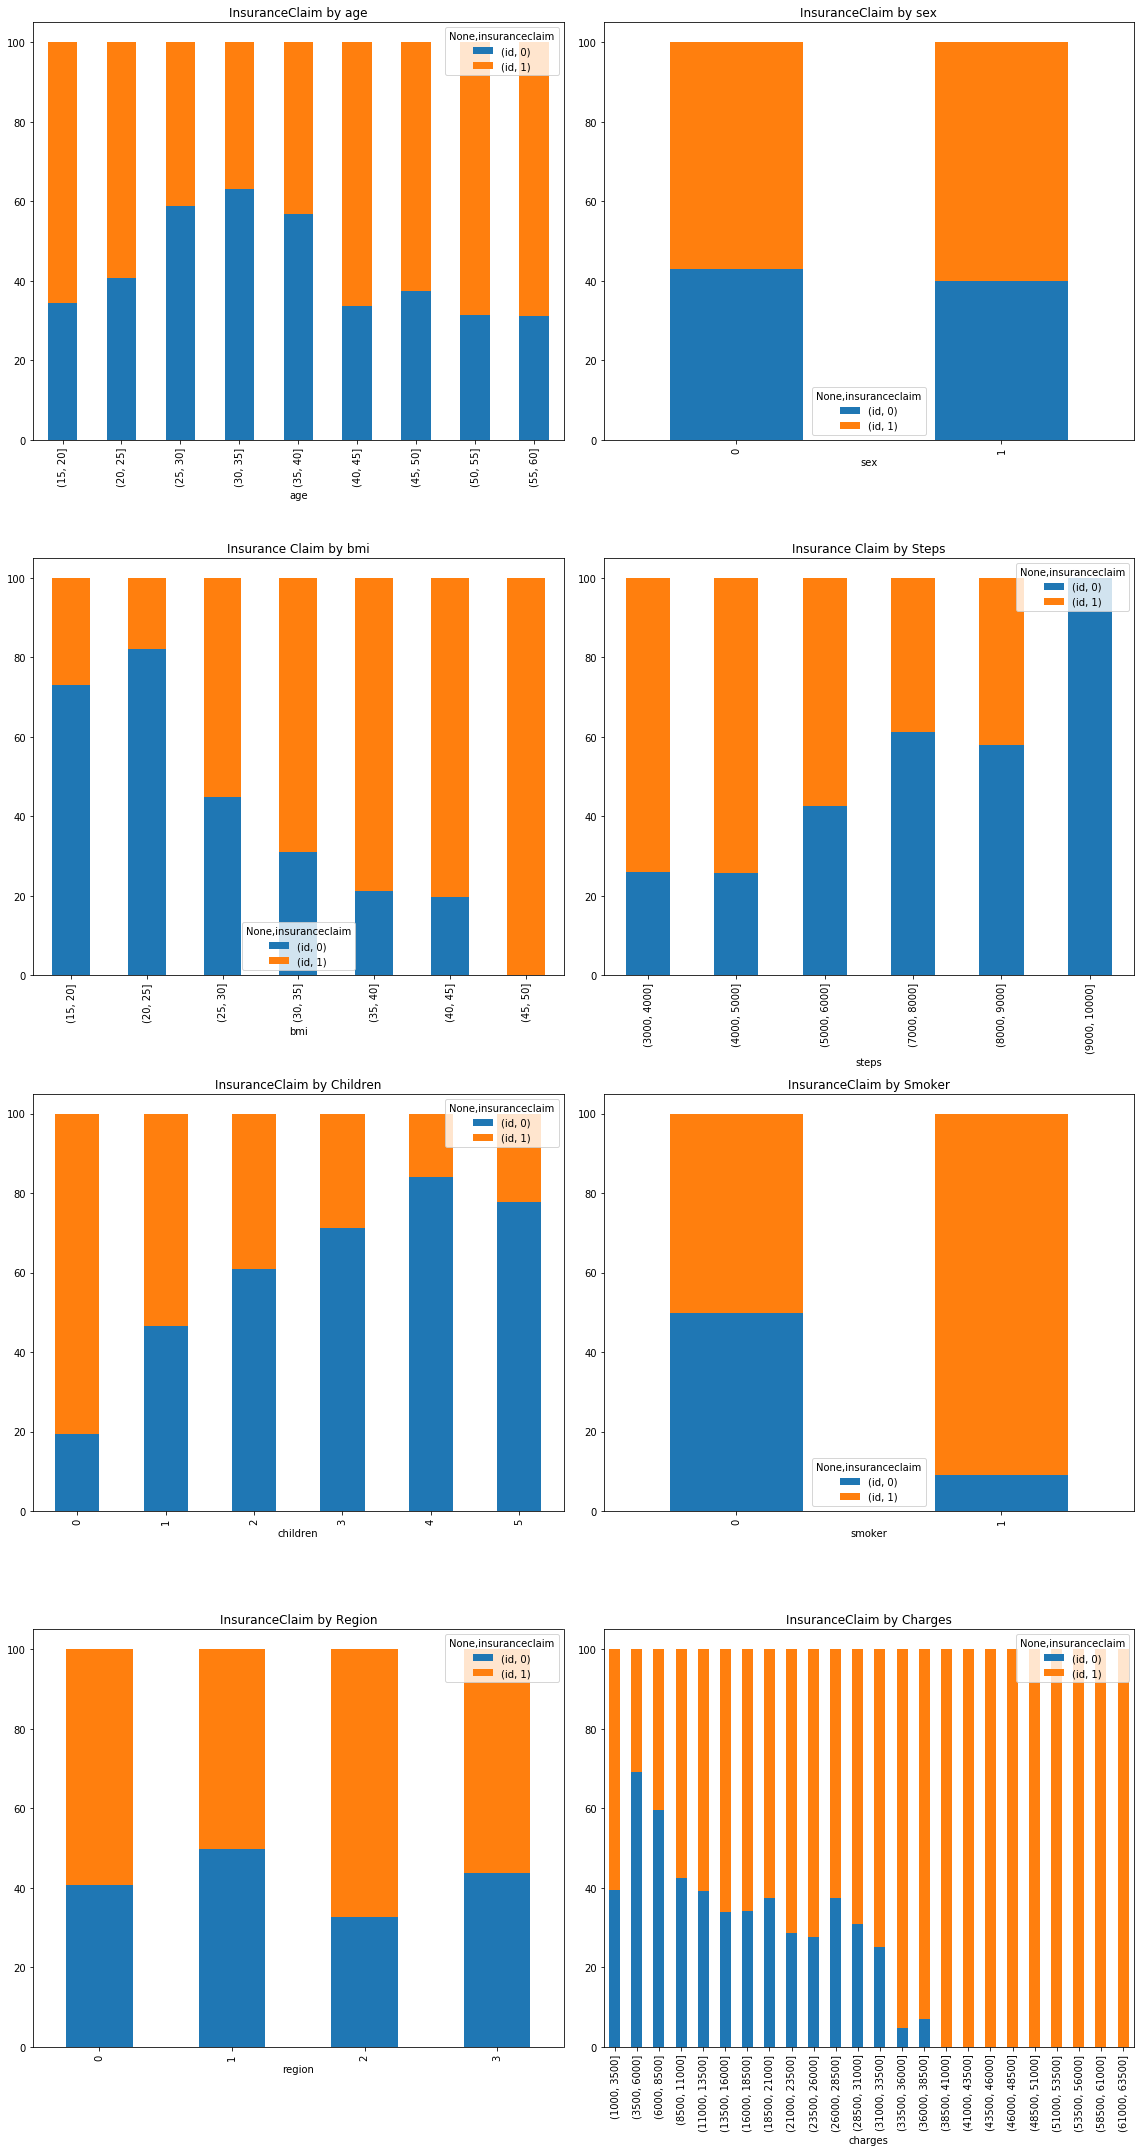

In [39]:

fig = plt.figure(figsize=(16, 30))

#Insurance Claim vs Age
ax1 = plt.subplot('421')
ax1.set_title('InsuranceClaim by age')
var1 = df.groupby([pd.cut(df['age'], np.arange(15,65,5)), 
                   'insuranceclaim']).agg({'id':'count'})
var1_pct = var1.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))
var1_pct.unstack().plot(kind = 'bar', stacked = True, ax = ax1)

#Insurance Claim vs Sex
ax2 = plt.subplot('422')
ax2.set_title('InsuranceClaim by sex')
var2 = df.groupby(['sex','insuranceclaim']).agg({'id':'count'})
var2_pct=var2.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))
var2_pct.unstack().plot(kind='bar',stacked = True, ax = ax2)

#Insurance Claim vs BMI
ax3=plt.subplot('423')
ax3.set_title('Insurance Claim by bmi')
var3 = df.groupby([pd.cut(df['bmi'],np.arange(15,55,5)), 'insuranceclaim']).agg({'id':'count'})
var3_pct = var3.groupby(level = 0).apply(lambda x: 100*x/float(x.sum()))
var3_pct.unstack().plot(kind = 'bar', stacked = True, ax = ax3)

#Insurance Claim vs Steps
ax4=plt.subplot('424')
ax4.set_title('Insurance Claim by Steps')
var4 = df.groupby([pd.cut(df['steps'],np.arange(3000,11000,1000)), 'insuranceclaim']).agg({'id':'count'})
var4_pct = var4.groupby(level = 0).apply(lambda x: 100*x/float(x.sum()))
var4_pct.unstack().plot(kind = 'bar', stacked = True, ax = ax4)

#Insurance Claim vs Children
ax5 = plt.subplot('425')
ax5.set_title('InsuranceClaim by Children')
var5 = df.groupby(['children','insuranceclaim']).agg({'id':'count'})
var5_pct=var5.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))
var5_pct.unstack().plot(kind='bar',stacked = True, ax = ax5)

#Insurance Claim vs Smoker
ax6 = plt.subplot('426')
ax6.set_title('InsuranceClaim by Smoker')
var6 = df.groupby(['smoker','insuranceclaim']).agg({'id':'count'})
var6_pct=var6.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))
var6_pct.unstack().plot(kind='bar',stacked = True, ax = ax6)

#Insurance Claim vs Region
ax7 = plt.subplot('427')
ax7.set_title('InsuranceClaim by Region')
var7 = df.groupby(['region','insuranceclaim']).agg({'id':'count'})
var7_pct=var7.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))
var7_pct.unstack().plot(kind='bar',stacked = True, ax = ax7)

#Insurance Claim vs Charges
ax8 = plt.subplot('428')
ax8.set_title('InsuranceClaim by Charges')
var8 = df.groupby([pd.cut(df['charges'], np.arange(1000,65000,2500)), 
                   'insuranceclaim']).agg({'id':'count'})
var8_pct = var8.groupby(level=0).apply(lambda x: 100*x/float(x.sum()))
var8_pct.unstack().plot(kind = 'bar', stacked = True, ax = ax8)



fig.tight_layout()

plt.show()



"sex" feature might drop in the later analysis.

### Data cleaning

categorical variables should be changed into dummy variables
sex only has two values, not necessary
region has no patucular orders, so it is better to transfrom it to dummy variables.


Features Pre-processing for Logistic Regression

In [40]:
def pre_process_features(X, catlist, notprocesslist):
    
    """ since all data type is int/float, the catlist should be a list with feature should be categorical data,
    this function will convert such data into dummy variables;
    also, normalize numerical data."""
    
    # Initialize new dataframe.
    output = pd.DataFrame(index = X.index)
    
    #loop through each feature
    for col, col_data in X.iteritems():
        # change categorical data into dummy variables
        if col in catlist and col not in notprocesslist:
            col_data = pd.get_dummies(col_data, prefix = col)
        elif col not in notprocesslist:
            # normalize numerical data
            print(col, 'mean:', col_data.mean(), 'std:', col_data.std())
            col_data = (col_data - col_data.mean())/col_data.std()
            
        
        #put columns together
        output = output.join(col_data)
        
    return output
        
            


Create datasets for logistic regression and tree related model

In [41]:
catlist = ['region']
notprocess_logistic = ['id', 'insuranceclaim']
notprocess_tree = ['id', 'age', 'sex', 'bmi', 'steps', 'children', 'smoker', 'charges', 'insuranceclaim']
df_logistic = pre_process_features(df, catlist, notprocess_logistic)
df_tree = pre_process_features(df, catlist, notprocess_tree)
df_rf = df_tree
print('Feature Pre-Processing is DONE!')

age mean: 39.20702541106129 std: 14.049960379216168
sex mean: 0.5052316890881914 std: 0.5001595692843718
bmi mean: 30.66339686098655 std: 6.098186911679016
steps mean: 5328.62331838565 std: 2453.6432359877017
children mean: 1.0949177877429 std: 1.2054927397819093
smoker mean: 0.20478325859491778 std: 0.40369403754562083
charges mean: 13270.422265141278 std: 12110.011236694005
Feature Pre-Processing is DONE!


separate predictors and target variable and drop id

In [42]:
X_logistic = df_logistic.drop(['id', 'insuranceclaim'], axis = 1)
y_logistic = df_logistic['insuranceclaim']

X_tree = df_tree.drop(['id', 'insuranceclaim'], axis = 1)
y_tree = df_tree['insuranceclaim']

X_rf = df_rf.drop(['id', 'insuranceclaim'], axis = 1)
y_rf = df_rf['insuranceclaim']



Split dataset into traingset and testset (70/30)

In [43]:
from sklearn.model_selection import train_test_split

X_logistic_train, X_logistic_test, y_logistic_train, y_logistic_test = train_test_split(
    X_logistic, y_logistic, test_size = 0.3, random_state = 123)

X_tree_train, X_tree_test, y_tree_train, y_tree_test = train_test_split(
    X_tree, y_tree, test_size = 0.3, random_state = 123)

X_rf_train, X_rf_test, y_rf_train, y_rf_test = train_test_split(
    X_rf, y_rf, test_size = 0.3, random_state = 123)



### Logistic Regression Model

In [44]:
#build the logistic regression model with l2 regularization 
# note: default cutoff point is 0.5
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

model_log = LogisticRegression(penalty = 'l2',solver='liblinear')
model_log.fit(X_logistic_train, y_logistic_train)


    

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='liblinear',
          tol=0.0001, verbose=0, warm_start=False)

Don't need this...

In [45]:
# Confusion Matrix
def CM(Act, Pred):
    TPC = 0
    TNC = 0
    FPC = 0
    FNC = 0
    if len(Act) != len(Pred): 
        print('not same len')
       
    else:
        for i in range(len(Act)):
            if Act[i] == 1 and Pred[i] == 1:
                TPC = TPC + 1
            elif Act[i] == 0 and Pred[i] == 0:
                TNC = TNC + 1
            elif Act[i] == 1 and Pred[i] == 0:
                FNC = FNC + 1
            elif Act[i] == 0 and Pred[i] == 1:
                FPC =FPC + 1
                
    print('TP =',TPC,'FP =', FPC,'FN =', FNC, 'TN =',TNC)
    Accuracy = (TPC + TNC)/(len(Pred))
    Precision_PPV = TPC/(TPC + FPC)
    Sensitivity = TPC/(TPC + FNC)
    Specificity = TNC/(FPC + TNC)
    #PPV = TPC/(TPC + FPC)
    print('Sensitivity =', Sensitivity,'Specificity =', Specificity, 'Positive Predictive Value =', Precision_PPV)
    return TPC, TNC, FPC, FNC, Sensitivity, Specificity,Precision_PPV
        


In [46]:
def F1_Score(precision, sensitivity):
    f1 = 2/((1/precision) + (1/sensitivity))
    return f1

In [47]:
# hyperparameter tuning
# run alternative cutoff points.
 

cutoff_list = np.linspace(0.01,0.99,99)
train_prob = pd.DataFrame(model_log.predict_proba(X_logistic_train)).loc[:,1]
f1_best = 0
cutoff_best = 0
flag_best = []
cm_best = ()

for cutoff in cutoff_list:
    y_train_flag = train_prob.apply(lambda x: 1 if x > cutoff else 0)
    tn, fp, fn, tp = confusion_matrix(np.array(y_logistic_train), np.array(y_train_flag)).ravel()
    Precision_PPV = tp/(tp+fp)
    Sensitivity = tp/(tp+fn)
    
    f1 = F1_Score(Precision_PPV, Sensitivity)
    if f1 > f1_best:
        f1_best = f1
        cutoff_best = cutoff
        flag_best = y_train_flag
        cm_best = confusion_matrix(np.array(y_logistic_train), np.array(y_train_flag))

    
print("cutoff_best =", cutoff_best, 'f1_best =', f1_best, 'Confusion Matrix:',cm_best)    

    
    

cutoff_best = 0.52 f1_best = 0.9063948100092679 Confusion Matrix: [[346  49]
 [ 52 489]]


In [48]:
# run the Logistic Regression on the test set
test_prob = pd.DataFrame(model_log.predict_proba(X_logistic_test)).loc[:,1]
y_test_flag = test_prob.apply(lambda x: 1 if x > cutoff_best else 0)
tnt,fpt,fnt,tpt = confusion_matrix(np.array(y_logistic_test), np.array(y_test_flag)).ravel()
precision_logistic = tpt/(tpt+fpt)
sensitivity_logistic = tpt/(tpt+fnt)
f1_logistic = F1_Score(precision_logistic, sensitivity_logistic)
cm_logistic = confusion_matrix(np.array(y_logistic_test), np.array(y_test_flag))
print('F1 Score for Logistic Regression:', f1_logistic)
print('The confusion matrix is:', cm_logistic)

F1 Score for Logistic Regression: 0.909853249475891
The confusion matrix is: [[142  18]
 [ 25 217]]


In [49]:
#accuracy
print('Accuracy:', model_log.score(X_logistic_test, y_logistic_test))


Accuracy: 0.8880597014925373


In [50]:
# Use Scikit Learn package to double check
from sklearn.metrics import classification_report
print(classification_report(y_logistic_test, y_test_flag))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       160
           1       0.92      0.90      0.91       242

   micro avg       0.89      0.89      0.89       402
   macro avg       0.89      0.89      0.89       402
weighted avg       0.89      0.89      0.89       402



#### Model Parameters

In [51]:
colnames = list(X_logistic_train.columns)
coef_log = model_log.coef_
for i in range(X_logistic_train.shape[1]):
    print(colnames[i],':',coef_log[0][i])
    
print('Intercept:', model_log.intercept_[0])

#type(model_log.coef_)

age : 0.3995202293747121
sex : -0.028088740535673097
bmi : 1.8142170954915757
steps : 0.18012279653755664
children : -1.7117697654876576
smoker : 1.8534416188515919
region_0 : 0.39888707293533376
region_1 : -0.01718986701864857
region_2 : 0.18086747403759057
region_3 : 0.07079418832825055
charges : -0.06664814153576402
Intercept: 0.6333588682825338


#### What if drop the "sex" feature?

In [52]:
#drop "sex"
X_logistic_train_simple = X_logistic_train.drop('sex', axis = 1)
X_logistic_test_simple = X_logistic_test.drop('sex', axis = 1)

model_log_simple = LogisticRegression(penalty = 'l2',solver='liblinear')
model_log_simple.fit(X_logistic_train_simple, y_logistic_train)


test_prob_simple = pd.DataFrame(model_log_simple.predict_proba(X_logistic_test_simple)).loc[:,1]
y_test_flag_simple = test_prob_simple.apply(lambda x: 1 if x > cutoff_best else 0)

print('Classification report without "sex" feature')
print(classification_report(y_logistic_test, y_test_flag_simple))
print('*********************************************************')

print('Classification report with "sex" feature')
print(classification_report(y_logistic_test, y_test_flag))

print('---------------------------------------------------------')
print('Confusion Matrix without "sex" feature')
print(confusion_matrix(np.array(y_logistic_test), np.array(y_test_flag_simple)))

print('*********************************************************')
print('Confusion Matrix with "sex" feature')
print(confusion_matrix(np.array(y_logistic_test), np.array(y_test_flag)))


Classification report without "sex" feature
              precision    recall  f1-score   support

           0       0.86      0.89      0.87       160
           1       0.92      0.90      0.91       242

   micro avg       0.90      0.90      0.90       402
   macro avg       0.89      0.89      0.89       402
weighted avg       0.90      0.90      0.90       402

*********************************************************
Classification report with "sex" feature
              precision    recall  f1-score   support

           0       0.85      0.89      0.87       160
           1       0.92      0.90      0.91       242

   micro avg       0.89      0.89      0.89       402
   macro avg       0.89      0.89      0.89       402
weighted avg       0.89      0.89      0.89       402

---------------------------------------------------------
Confusion Matrix without "sex" feature
[[142  18]
 [ 24 218]]
*********************************************************
Confusion Matrix with "se

### Decision Tree

In [53]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
from sklearn.metrics import make_scorer, mean_squared_error, f1_score, accuracy_score

#use F1 as the score function.
tree_score = make_scorer(f1_score, greater_is_better = True)

#store scores
score_cache = pd.DataFrame(columns = ['max_depth', 'min_samples_split', 'f1_score', 'accuracy_score'])

#creat k folders, k = 5
k = 5
kf = KFold(n_splits=k, random_state = 123)

#training set is ready
X_tree_train.index = range(len(X_tree_train))
y_tree_train = pd.DataFrame(y_tree_train)
y_tree_train.index = range(len(y_tree_train))

#
for max_depth in range (5, 10):
    print('model on max_depth:', max_depth)
    for min_samples_split in range(50, 150, 10):
        print('model on min_samples_split:', min_samples_split)
        avg_f1 = 0.0
        avg_accuracy = 0.0
        for train, cv in kf.split(X_tree_train):
            #split training set to train and cv sets.
            X_train, X_cv, y_train, y_cv = X_tree_train.iloc[train], X_tree_train.iloc[cv], y_tree_train.iloc[train], y_tree_train.iloc[cv]
            #use decision tree classifier with selected max_depth and min_samples_split
            clf = DecisionTreeClassifier(random_state = 123,
                                        max_depth = max_depth,
                                        min_samples_split = min_samples_split)
            clf.fit(X_train, y_train)
            #avg scores 
            avg_f1 = avg_f1 + f1_score(y_cv, clf.predict(X_cv))
            avg_accuracy = avg_accuracy + accuracy_score(y_cv, clf.predict(X_cv))
        
        avg_f1 = avg_f1/k
        avg_accuracy = avg_accuracy/k
        print('F1 Score:', avg_f1, '; Accuracy:', avg_accuracy)
        
        score_cache = score_cache.append(pd.DataFrame([[max_depth, min_samples_split, avg_f1, avg_accuracy]],
                                                      columns = ['max_depth', 'min_samples_split', 'f1_score', 'accuracy_score']))

opt = score_cache[score_cache.f1_score == score_cache.f1_score.max()]

print('optimal max_depth:',opt.max_depth[0])
print('optimal min_samples_split:', opt.min_samples_split[0])
print('F1 score when using optimal hyperparameter:', opt.f1_score[0])
print('Accuracy when using optimal hyperparameter:', opt.accuracy_score[0])

print('Hyperparameter Tuning is DONE!!!')
    


model on max_depth: 5
model on min_samples_split: 50
F1 Score: 0.905238196178184 ; Accuracy: 0.8910114916372738
model on min_samples_split: 60
F1 Score: 0.905238196178184 ; Accuracy: 0.8910114916372738
model on min_samples_split: 70
F1 Score: 0.905238196178184 ; Accuracy: 0.8910114916372738
model on min_samples_split: 80
F1 Score: 0.905238196178184 ; Accuracy: 0.8910114916372738
model on min_samples_split: 90
F1 Score: 0.905238196178184 ; Accuracy: 0.8910114916372738
model on min_samples_split: 100
F1 Score: 0.905238196178184 ; Accuracy: 0.8910114916372738
model on min_samples_split: 110
F1 Score: 0.905238196178184 ; Accuracy: 0.8910114916372738
model on min_samples_split: 120
F1 Score: 0.8856056988433438 ; Accuracy: 0.8664523836613949
model on min_samples_split: 130
F1 Score: 0.8730823857316798 ; Accuracy: 0.8493400841961544
model on min_samples_split: 140
F1 Score: 0.8729599331820428 ; Accuracy: 0.8472010467629992
model on max_depth: 6
model on min_samples_split: 50
F1 Score: 0.90893

#### Decision Tree Model with optimal hyperparameters

In [55]:
clf_tree_opt = DecisionTreeClassifier(max_depth = opt.max_depth[0],
                                      min_samples_split = opt.min_samples_split[0],
                                      random_state = 123)

clf_tree_opt.fit(X_tree_train, y_tree_train)

print("Decision Tree F1 Score on test set:", f1_score(y_tree_test, clf_tree_opt.predict(X_tree_test)))
print("Decision Tree Accurate on test set:", accuracy_score(y_tree_test, clf_tree_opt.predict(X_tree_test)))
print(confusion_matrix(np.array(y_tree_test), clf_tree_opt.predict(X_tree_test)))


Decision Tree F1 Score on test set: 0.9193548387096775
Decision Tree Accurate on test set: 0.900497512437811
[[134  26]
 [ 14 228]]


In [56]:
clf_tree_opt

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=50,
            min_weight_fraction_leaf=0.0, presort=False, random_state=123,
            splitter='best')

Decision Tree is better than Logistic Regreesion model in this case!!!

### Visualizae the Decision Tree

In [57]:
from sklearn.tree import export_graphviz

def visualize_tree(tree, feature_names):
    """
    Create tree png
    ---
    package:
    from sklearn.tree import export_graphviz
    ---
    Args
    ---
    tree -- scikitlearn DecisionTreeClassifier
    feature_names -- list of feature_names, can be done by X.train.columns
    ---
    Output: dt.png
    """
    with open("dt.dot",'w') as f:
        export_graphviz(tree, 
                        out_file = f,
                        feature_names = feature_names)
        
    command = ["dot", "-Tpng", "dt.dot", "-o", "dt.png"]
    command
    try:
        subprocess.check_call(command)
    except:
        exit('Tree Visualization Failed')
visualize_tree(clf_tree_opt, X_tree_train.columns)        
    

In [58]:
visualize_tree(clf_tree_opt, X_tree_train.columns)


print('dt.dot has been created')


dt.dot has been created


Online Graphviz
http://webgraphviz.com/

## Run the Models on the full dataset

In [59]:
# Scores on Logistic Regression when using full dataset.
X_logistic_simple = X_logistic.drop('sex', axis = 1)

simple_prob = pd.DataFrame(model_log_simple.predict_proba(X_logistic_simple)).loc[:,1]
y_simple_flag = simple_prob.apply(lambda x: 1 if x > cutoff_best else 0)
tn,fp,fn,tp = confusion_matrix(np.array(y_logistic), np.array(y_simple_flag)).ravel()
precision_logistic = tp/(tp+fp)
sensitivity_logistic = tp/(tp+fn)
f1_logistic = F1_Score(precision_logistic, sensitivity_logistic)
cm_logistic = confusion_matrix(np.array(y_logistic), np.array(y_simple_flag))
print('Logistic Regression F1 Score on FULL set:', f1_logistic)
print('Logistic Regression Accurate on FULL set:', model_log_simple.score(X_logistic_simple, y_logistic))
print('Logistic Regression Confusion Matrix on Full Set:')
print(cm_logistic)

print('*************************************************************')

# Scores on Decision Tree when using full dataset.
print('Decision Tree F1 Score on FULL set:', f1_score(y_tree, clf_tree_opt.predict(X_tree)))
print('Decision Tree Accurate on FULL set:', accuracy_score(y_tree, clf_tree_opt.predict(X_tree)))
print('Decision Tree Confusion Matrix on Full Set:')
print(confusion_matrix(np.array(y_tree), clf_tree_opt.predict(X_tree)))


Logistic Regression F1 Score on FULL set: 0.9064102564102565
Logistic Regression Accurate on FULL set: 0.8886397608370703
Logistic Regression Confusion Matrix on Full Set:
[[485  70]
 [ 76 707]]
*************************************************************
Decision Tree F1 Score on FULL set: 0.9239472030169705
Decision Tree Accurate on FULL set: 0.9095665171898356
Decision Tree Confusion Matrix on Full Set:
[[482  73]
 [ 48 735]]


### AU ROC

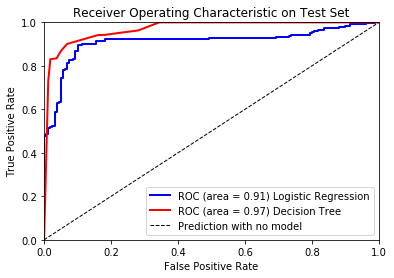

In [60]:
#ROC on test set

%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_output_logistic = model_log.predict_proba(X_logistic_test)
y_output_tree = clf_tree_opt.predict_proba(X_tree_test)

# ROC curve and AUC for each model
fpr1, tpr1, thresholds1 = roc_curve(y_logistic_test, y_output_logistic[:, 1])
fpr2, tpr2, thresholds2 = roc_curve(y_tree_test, y_output_tree[:, 1])

# AUROC
roc_auc1 = auc(fpr1, tpr1)
roc_auc2 = auc(fpr2, tpr2)

plt.plot(fpr1, tpr1, lw = 2, color = 'blue',
         label = 'ROC (area = %0.2f) Logistic Regression' % roc_auc1)

plt.plot(fpr2, tpr2, lw = 2, color = 'red',
         label = 'ROC (area = %0.2f) Decision Tree' % roc_auc2)

plt.plot([0,1], [0,1], linestyle = '--', lw = 1, color = 'k', 
         label = 'Prediction with no model')

plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic on Test Set')
plt.legend(loc='lower right')
plt.show()

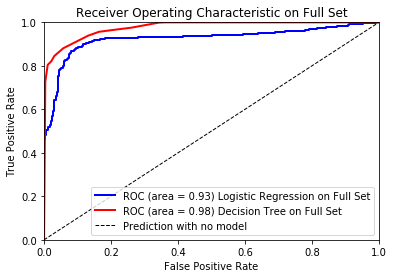

In [61]:
# ROC on full dataset
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

y_output_logistic_full = model_log_simple.predict_proba(X_logistic_simple)
y_output_tree_full = clf_tree_opt.predict_proba(X_tree)

# ROC curve and AUC for each model
fpr1f, tpr1f, thresholds1f = roc_curve(y_logistic, y_output_logistic_full[:, 1])
fpr2f, tpr2f, thresholds2f = roc_curve(y_tree, y_output_tree_full[:, 1])

# AUROC
roc_auc1f = auc(fpr1f, tpr1f)
roc_auc2f = auc(fpr2f, tpr2f)

plt.plot(fpr1f, tpr1f, lw = 2, color = 'blue',
         label = 'ROC (area = %0.2f) Logistic Regression on Full Set' % roc_auc1f)

plt.plot(fpr2f, tpr2f, lw = 2, color = 'red',
         label = 'ROC (area = %0.2f) Decision Tree on Full Set' % roc_auc2f)

plt.plot([0,1], [0,1], linestyle = '--', lw = 1, color = 'k', 
         label = 'Prediction with no model')

plt.xlim([0,1])
plt.ylim([0,1])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic on Full Set')
plt.legend(loc='lower right')
plt.show()

### Cut-off Point

##### Health Program
The data set shows an average medical cost of \\$13,270.42 we assume the average medical calim cost is \\$10K if a there are claims for this member.

if a Health Program is an option to insurance company to reduce cost, we assume:

    The Health Program costs $1000 for each member, and
    50% of the chance to reduce medical claim cost by 80% 
    
    
Question: how to chose the cutoff point to maximize the savings?
    
 *********************************************************************


In [62]:
#if no member participates this program:
membership = len(df)
claimcount = df['insuranceclaim'].sum()
cost_0 = claimcount * 10000 /10**6
print("Total Cost with no program = $",cost_0, 'M')

#if EVERY member participates this program:
cost_all = (membership*1000+claimcount*0.5*2000+claimcount*0.5* 10000)/10**6
print('Cost of every member participates the program = $', cost_all, 'M')

Total Cost with no program = $ 7.83 M
Cost of every member participates the program = $ 6.036 M


In [63]:
#loop thru all cutoff point and select the best one to reduce cost.
from sklearn.metrics import confusion_matrix

best_cutoff = 0
best_cost = 999999999
best_cm = []

for c in range(1,99):
    c = c/100
    simple_prob = pd.DataFrame(model_log_simple.predict_proba(X_logistic_simple)).loc[:,1]
    y_simple_flag = simple_prob.apply(lambda x: 1 if x > c else 0)
    
    # calculate classification count
    tn,fp,fn,tp = confusion_matrix(np.array(y_logistic), np.array(y_simple_flag)).ravel()
    
    #program cost
    cost_prog = 1000 * (tp + fp)
    #correctly predicting claims
    # 50% of the time (TP) costs 2K + (50% of the time not work + failed to idntify claims) * 10K
    cost_claim = tp * 0.5 *2000 + 10000 * (tp * 0.5 + fn)
    
    #total claims
    cost = cost_prog + cost_claim
    
    if cost < best_cost:
        best_cost = cost
        best_cutoff = c
        best_cm = confusion_matrix(np.array(y_logistic), np.array(y_simple_flag))

    
    


In [64]:
print('Best Cutoff Point:',best_cutoff)
print('Total Claim Costs: $', best_cost/10**6,'M')
print('Consurion Matrix when Best Cutoff Point is used:')
print(best_cm)

Best Cutoff Point: 0.46
Total Claim Costs: $ 5.755 M
Consurion Matrix when Best Cutoff Point is used:
[[461  94]
 [ 60 723]]


In [65]:
print(cutoff_best)

0.52


In [66]:
# How about our Decision Tree?
cm = confusion_matrix(np.array(y_tree), clf_tree_opt.predict(X_tree))
tp, fp, fn, tn = cm[0][0],cm[0][1],cm[1][0],cm[1][1]
#program cost
cost_prog = 1000 * (tp + fp)
#correctly predicting claims
# 50% of the time (TP) costs 2K + (50% of the time not work + failed to idntify claims) * 10K
cost_claim = tp * 0.5 *2000 + 10000 * (tp * 0.5 + fn)
    
#total claims
cost = cost_prog + cost_claim

print('Total Claim Costs: $', cost/10**6,'M')
print('Consurion Matrix for DT:')
print(cm)

Total Claim Costs: $ 3.927 M
Consurion Matrix for DT:
[[482  73]
 [ 48 735]]
